In [2]:
pip install yfinance

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install plotly.express as px

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement as (from versions: none)
ERROR: No matching distribution found for as

[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data
import pandas_datareader as web


In [ ]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yf
import time

#yfin.pdr_override()



AttributeError: module 'time' has no attribute 'date_input'

In [10]:
import yfinance as yf

# Define the ticker symbol and the date range
ticker_symbol = 'AAPL'  # Example: Apple Inc.
start_date = '2020-01-01'
end_date = '2025-01-29'

# Download stock data
df = yf.download(ticker_symbol, start=start_date, end=end_date)

# Display the first few rows of the data
print(data.head())

# Optionally, you can save the data to a CSV file
df.to_csv(f'{ticker_symbol}_stock_data.csv')


[*********************100%***********************]  1 of 1 completed

Price           Close       High        Low       Open     Volume
Ticker           AAPL       AAPL       AAPL       AAPL       AAPL
Date                                                             
2020-01-02  72.796021  72.856613  71.545387  71.799873  135480400
2020-01-03  72.088310  72.851776  71.862907  72.020447  146322800
2020-01-06  72.662720  72.701500  70.954010  71.206077  118387200
2020-01-07  72.320984  72.929329  72.100426  72.672417  108872000
2020-01-08  73.484352  73.787315  72.022858  72.022858  132079200


In [11]:
df= df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2020-01-02,72.796021,72.856613,71.545387,71.799873,135480400
1,2020-01-03,72.088310,72.851776,71.862907,72.020447,146322800
2,2020-01-06,72.662720,72.701500,70.954010,71.206077,118387200
3,2020-01-07,72.320984,72.929329,72.100426,72.672417,108872000
4,2020-01-08,73.484352,73.787315,72.022858,72.022858,132079200


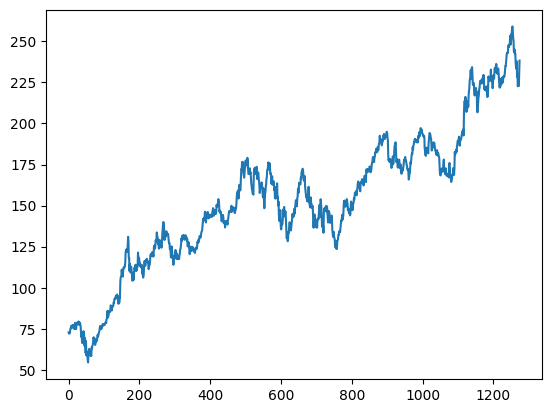

In [12]:
plt.plot(df.Close)

In [13]:
ma100=df.Close.rolling(100).mean()
ma100

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1270,232.952343
1271,232.926532
1272,232.858958
1273,232.870074


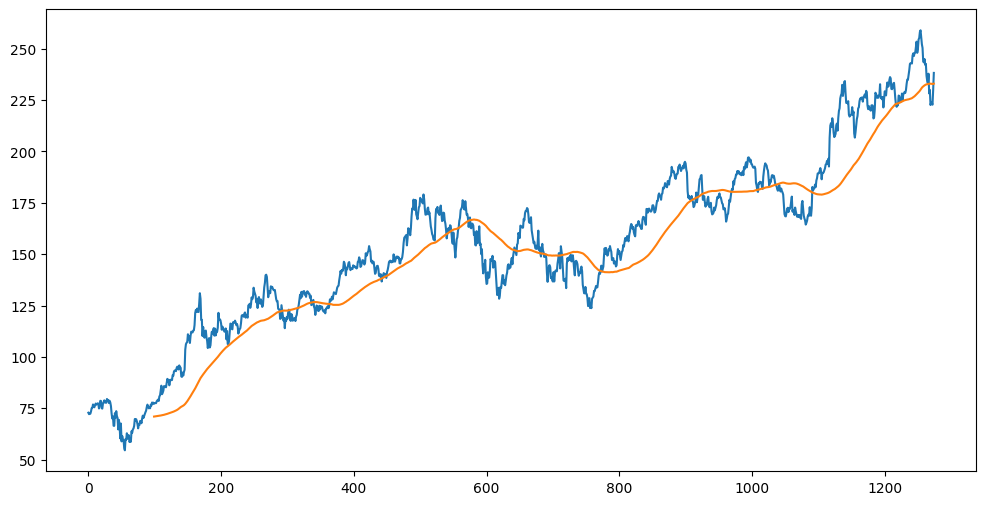

In [14]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100)

In [15]:
ma200=df.Close.rolling(200).mean()
ma200

Ticker,AAPL
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
1270,217.250835
1271,217.524292
1272,217.798979
1273,218.102987


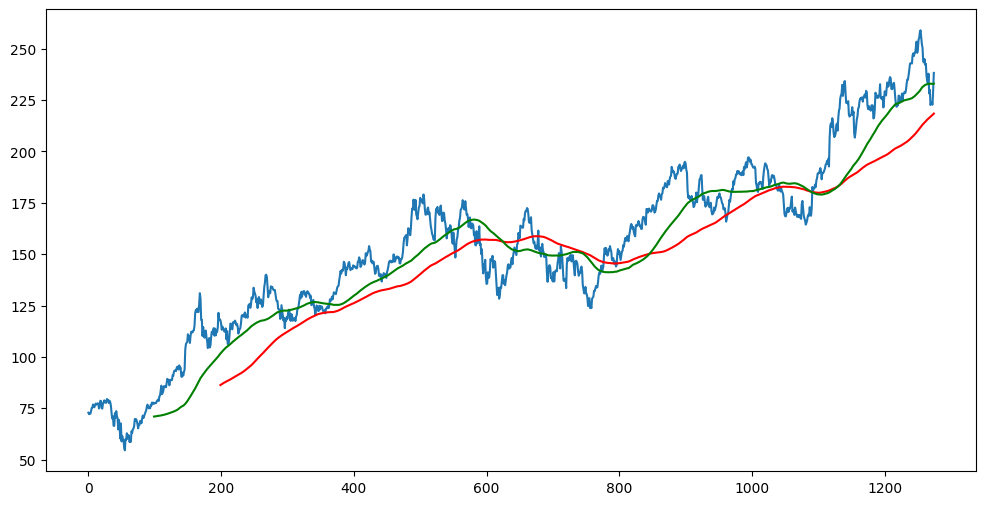

In [16]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma200,'r')
plt.plot(ma100,'g')

In [17]:
df.shape

(1275, 6)

In [18]:
#splitting data into training and testing

data_training=pd.DataFrame(df['Close'][0:int(len(df)*.70)])
data_testing=pd.DataFrame(df['Close'][int(len(df)*.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(892, 1)
(383, 1)


In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [20]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.13144028],
       [0.12635331],
       [0.13048213],
       [0.12802575],
       [0.13638796],
       [0.14760736],
       [0.14882688],
       [0.16037718],
       [0.15292076],
       [0.15058641],
       [0.1573808 ],
       [0.16346081],
       [0.15969794],
       [0.1616664 ],
       [0.16433177],
       [0.16272903],
       [0.14642277],
       [0.16164896],
       [0.17323431],
       [0.17241539],
       [0.14739826],
       [0.14591753],
       [0.16366991],
       [0.16819949],
       [0.17474985],
       [0.1670489 ],
       [0.16970325],
       [0.16631531],
       [0.17956964],
       [0.17550077],
       [0.17564045],
       [0.16525017],
       [0.17331794],
       [0.1675203 ],
       [0.15485989],
       [0.12889271],
       [0.11125539],
       [0.11923575],
       [0.08582953],
       [0.08554996],
       [0.12999274],
       [0.11342067],
       [0.13685579],
       [0.11970726],
       [0.11291439],
       [0.0729944 ],
       [0.10647047],
       [0.089

In [21]:
data_training.shape

(892, 1)

In [22]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)

In [23]:
x_train.shape

(792, 100, 1)

In [24]:
from keras.layers import Dense,Dropout,LSTM
from keras.models import Sequential

In [25]:
model=Sequential()
model.add(LSTM(units=50, activation='relu',return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))



model.add(LSTM(units=60, activation='relu',return_sequences=True))
model.add(Dropout(0.3))



model.add(LSTM(units=80, activation='relu',return_sequences=True))
model.add(Dropout(0.4))


model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


c:\Users\thiru\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 84ms/step - loss: 0.2661
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0222
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0187
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0142
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - loss: 0.0130
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0148
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0125
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step - loss: 0.0116
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - loss: 0.0115
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 111ms/step - loss: 0.0105
Epoch 11/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0109
Epoch 12/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 109ms/step - loss: 0.0104
Epoch 13/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 113ms/step - loss: 0.0091
Epoch 14/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 110ms/step - loss: 0.0099
Epoch 15/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 115ms/step - loss: 0

In [29]:
model.save('keras_model.h5')